# Evaluation Data Analysis Report

## Installing the libraries

Install required libraries (run only once if not already installed)

If already installed, running this will just confirm that requirements are satisfied

These libraries are used for analyzing evaluation data and generating comparison charts

These are all the libraries used in this Jupyter notebook

In [6]:
pip install matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Import necessary libraries for data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# 📥 Data Input and Preparation

This section imports and prepares the evaluation data used for analysis. It includes:

- Importing necessary libraries
- Simulating or loading participant scores before and after the activity
- Structuring the data for analysis and visualization
- Reading data from file (`.csv`, `.xlsx`, etc.)

In [ ]:
df = pd.read_csv("evaluation_responses.csv")

In [ ]:
pre_scores = df["Pre-evaluation"]
post_scores = df["Post-evaluation"]

# 📊 Visualization of Pre- and Post-Evaluation Results

This section contains multiple chart types that visually represent the evaluation data collected before and after the intervention. These charts help identify trends, shifts in scores, and overall impact.

- **Bar Chart:** Comparison of score frequencies before and after.
- **Line Chart:** Visual trend of how participant numbers changed across scores.
- **Sankey Diagram:** Flow of participants from one score to another (pre → post).

## Bar chart

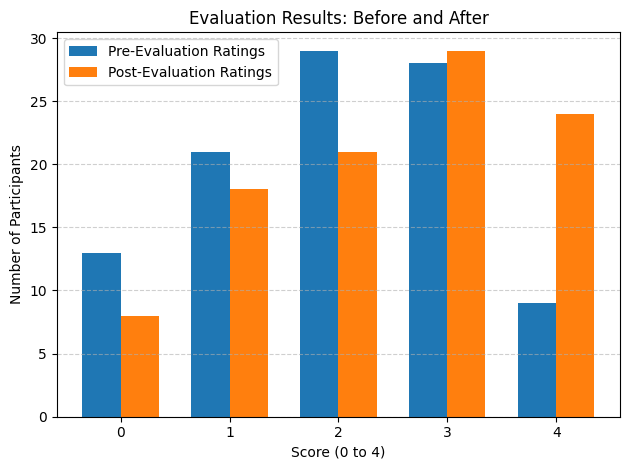

In [ ]:
# ----------------------------- Data Section -----------------------------
# Ubaciti podatke ovde, trenutno je random za 100 učesnika !!!!!!
# Separate ratings into pre-evaluation and post-evaluation
np.random.seed(42)
pre_eval = np.random.choice([0, 1, 2, 3, 4], size=100, p=[0.1, 0.2, 0.3, 0.3, 0.1])
post_eval = pre_eval + np.random.choice([-1, 0, 1], size=100, p=[0.1, 0.3, 0.6])
post_eval = np.clip(post_eval, 0, 4) # ovo se samo ostavlja

# ----------------------------- Data Preparation Section -----------------------------
# Convert scores to DataFrame
df = pd.DataFrame({
    "Pre": pre_eval,
    "Post": post_eval
})

# Count how many participants selected each score (0–4) before and after playing the game
pre_counts = df["Pre"].value_counts().sort_index()
post_counts = df["Post"].value_counts().sort_index()

# Ensure that all rating values from 0 to 4 appear on the chart
index = range(5)
pre_counts = pre_counts.reindex(index, fill_value=0)
post_counts = post_counts.reindex(index, fill_value=0)

# ----------------------------- Bar Chart Section -----------------------------
# Chart
width = 0.35
x = np.arange(5)

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, pre_counts, width, label='Pre-Evaluation Ratings')
bars2 = ax.bar(x + width/2, post_counts, width, label='Post-Evaluation Ratings')

ax.set_xlabel('Score (0 to 4)')
ax.set_ylabel('Number of Participants')
ax.set_title('Evaluation Results: Before and After')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in x])
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Line chart

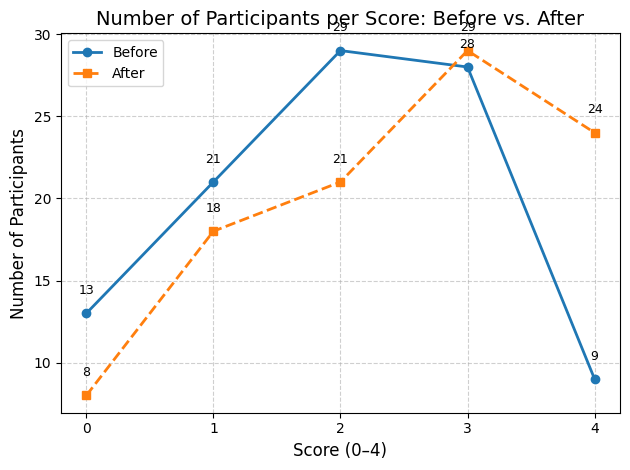

In [10]:
# ----------------------------- Data Section -----------------------------
# Ubaciti podatke ovde, trenutno je random za 100 učesnika !!!!!!
# Separate ratings into pre-evaluation and post-evaluation
np.random.seed(42)
pre_scores = np.random.choice([0, 1, 2, 3, 4], size=100, p=[0.1, 0.2, 0.3, 0.3, 0.1])
post_scores = pre_scores + np.random.choice([-1, 0, 1], size=100, p=[0.1, 0.3, 0.6])
post_scores = np.clip(post_scores, 0, 4)  # Ensure values stay within 0–4 range

# ----------------------------- Data Preparation Section -----------------------------
# Convert scores to DataFrame
df = pd.DataFrame({
    "Pre": pre_scores,
    "Post": post_scores
})

# Count how many participants selected each score (0–4)
pre_counts = df["Pre"].value_counts().sort_index()
post_counts = df["Post"].value_counts().sort_index()

# Ensure all scores from 0 to 4 are present
score_range = range(5)
pre_counts = pre_counts.reindex(score_range, fill_value=0)
post_counts = post_counts.reindex(score_range, fill_value=0)

# ----------------------------- Line Chart Section -----------------------------
# Create line chart comparing number of participants per score
fig, ax = plt.subplots()

ax.plot(score_range, pre_counts, marker='o', linestyle='-', linewidth=2, label='Before')
ax.plot(score_range, post_counts, marker='s', linestyle='--', linewidth=2, label='After')

# Set axis labels and title
ax.set_title('Number of Participants per Score: Before vs. After', fontsize=14)
ax.set_xlabel('Score (0–4)', fontsize=12)
ax.set_ylabel('Number of Participants', fontsize=12)
ax.set_xticks(score_range)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# Annotate each point with its value
for x in score_range:
    ax.text(x, pre_counts[x] + 1, str(pre_counts[x]), ha='center', va='bottom', fontsize=9)
    ax.text(x, post_counts[x] + 1, str(post_counts[x]), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Sankey diagram

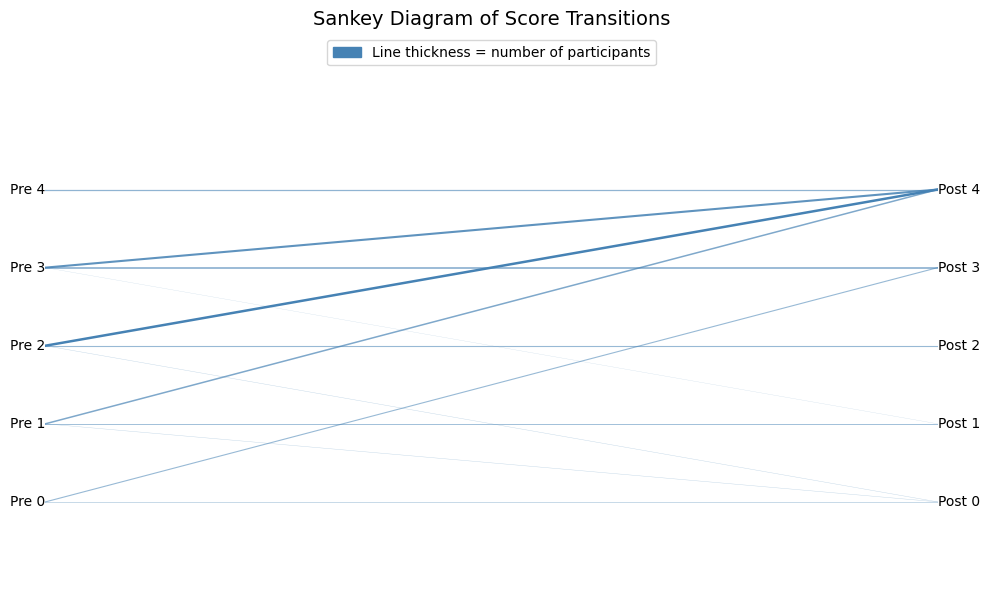

In [19]:
# ----------------------------- Data Section -----------------------------
# Ubaciti podatke ovde, trenutno je random za 100 učesnika !!!!!!
# Separate ratings into pre-evaluation and post-evaluation
np.random.seed(42)
pre_scores = np.random.choice([0, 1, 2, 3, 4], 100, p=[0.1, 0.2, 0.3, 0.3, 0.1])
post_scores = np.clip(pre_scores + np.random.choice([-2, 0, 3], 100, p=[0.1, 0.3, 0.6]), 0, 4)
df = pd.DataFrame({"Pre": pre_scores, "Post": post_scores})

# ----------------------------- Data Preparation Section -----------------------------
# Prepare transition counts
transition_counts = df.groupby(['Pre', 'Post']).size().reset_index(name='Count')

# ----------------------------- Sankey diagram Section -----------------------------
# Static Sankey-like plot using Matplotlib 
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 2)
ax.set_ylim(-1, 6)
ax.axis('off')

# Positions of labels
pre_y = np.arange(5)
post_y = np.arange(5)
pre_label_x = 0
post_label_x = 2

# Draw score labels
for y in pre_y:
    ax.text(pre_label_x, y, f"Pre {y}", va='center', ha='right', fontsize=10)
for y in post_y:
    ax.text(post_label_x, y, f"Post {y}", va='center', ha='left', fontsize=10)

# Draw flow lines
for _, row in transition_counts.iterrows():
    pre = row['Pre']
    post = row['Post']
    count = row['Count']
    alpha = 0.2 + 0.8 * (count / transition_counts['Count'].max())  # adjust transparency
    ax.plot([pre_label_x, post_label_x], [pre, post], lw=count * 0.1, alpha=alpha, color='steelblue')

# Legend
max_val = transition_counts['Count'].max()
legend_patch = mpatches.Patch(color='steelblue', label='Line thickness = number of participants')
ax.legend(handles=[legend_patch], loc='upper center')

plt.title("Sankey Diagram of Score Transitions", fontsize=14)
plt.tight_layout()
plt.show()



# Key Evaluation Characteristics 

This section extracts meaningful metrics that help highlight positive aspects of the evaluation.
1. **Average Score Improvement:** Indicates overall progress in perceived competence or understanding after the activity.
2. **Percentage of Participants Who Improved:** Reflects the portion of participants who experienced a positive change in score.
3. **Increase in Top-Level Scores (Score = 4):** Shows how many participants reached the highest level of confidence or skill after the evaluation.
4. **Percentage of Participants with No Change:** Helps identify stability – important for understanding who remained constant, possibly already high.

In [ ]:
# 1. Average Score Improvement
# Indicates overall progress in perceived competence or understanding after the activity
avg_pre = df['Pre'].mean()
avg_post = df['Post'].mean()
avg_diff = avg_post - avg_pre

# 2. Percentage of Participants Who Improved
# Reflects the portion of participants who experienced a positive change in score
improved_count = (df['Post'] > df['Pre']).sum()
total_participants = len(df)
percent_improved = improved_count / total_participants * 100

# 3. Increase in Top-Level Scores (Score = 4)
# Shows how many participants reached the highest level of confidence or skill after the evaluation
high_score_pre = (df['Pre'] == 4).sum()
high_score_post = (df['Post'] == 4).sum()
percent_high_pre = high_score_pre / total_participants * 100
percent_high_post = high_score_post / total_participants * 100
delta_high = percent_high_post - percent_high_pre

# 4. Percentage of Participants with No Change
# Helps identify stability – important for understanding who remained constant, possibly already high
no_change_count = (df['Post'] == df['Pre']).sum()
percent_no_change = no_change_count / total_participants * 100

# ----------------------------- Output of Key Metrics -----------------------------
print("=== Key Positive Evaluation Indicators ===\n")

print("1. Average Score Improvement")
print(f"   • Before: {avg_pre:.2f}")
print(f"   • After:  {avg_post:.2f}")
print(f"   → Improvement: {avg_diff:.2f} points\n")

print("2. Participants Who Improved")
print(f"   • Improved: {improved_count} / {total_participants}")
print(f"   → {percent_improved:.1f}% of all participants showed improvement\n")

print("3. High-End Shift (Score = 4)")
print(f"   • Before: {percent_high_pre:.1f}% had top score")
print(f"   • After:  {percent_high_post:.1f}% had top score")
print(f"   → Net increase in high scorers: +{delta_high:.1f}%\n")

print("4. No Change in Score")
print(f"   • No change: {no_change_count} / {total_participants}")
print(f"   → {percent_no_change:.1f}% reported the same score before and after\n")


=== Key Positive Evaluation Indicators ===

1. Average Score Improvement
   • Before: 1.99
   • After:  2.94
   → Improvement: 0.95 points

2. Participants Who Improved
   • Improved: 52 / 100
   → 52.0% of all participants showed improvement

3. High-End Shift (Score = 4)
   • Before: 9.0% had top score
   • After:  53.0% had top score
   → Net increase in high scorers: +44.0%

4. No Change in Score
   • No change: 40 / 100
   → 40.0% reported the same score before and after

